In [30]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def my_style(title='', xtitle='', ytitle='', gridstyle=':'):
    plt.grid(linestyle=gridstyle)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='talk', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'sans-serif']

# Посмотреть файлы с сечениями к моделированию

In [2]:
file_new = pd.read_csv('/store17/petrov/mc_edited/Cmd3Sim/data/cs_klks_nikitap', sep=' ', header=None, index_col=0)
file_old = pd.read_csv('/store17/petrov/mc_edited/Cmd3Sim/data/cs_klks_cmd2', sep=' ', header=None, index_col=0)

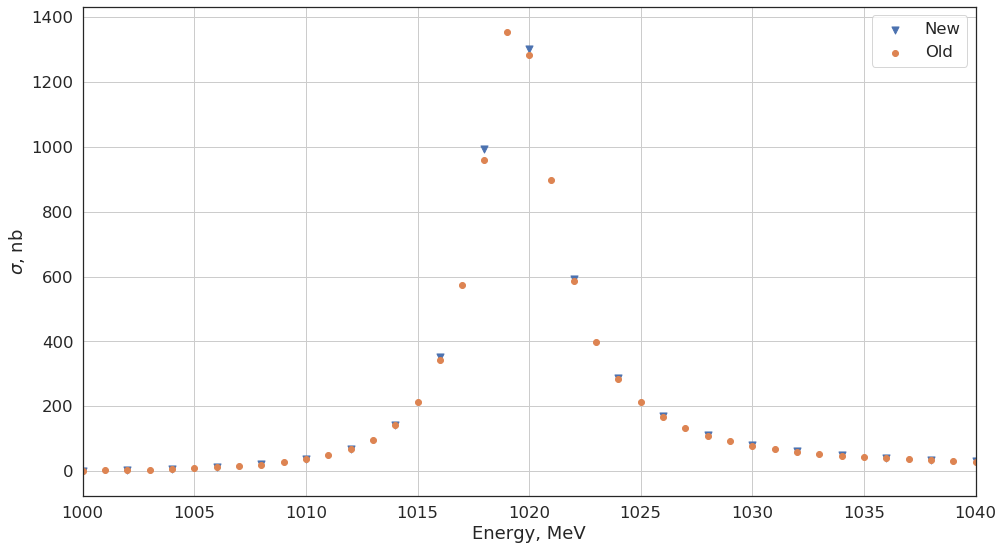

In [16]:
plt.scatter(x=file_new[1], y=file_new[2], label='New', marker='v', s=50)
plt.scatter(x=file_old[1], y=file_old[2], label='Old')
plt.grid()
plt.ylabel('$\\sigma$, nb')
plt.xlabel('Energy, MeV')
plt.xlim(1000, 1040)
plt.legend(frameon=True);

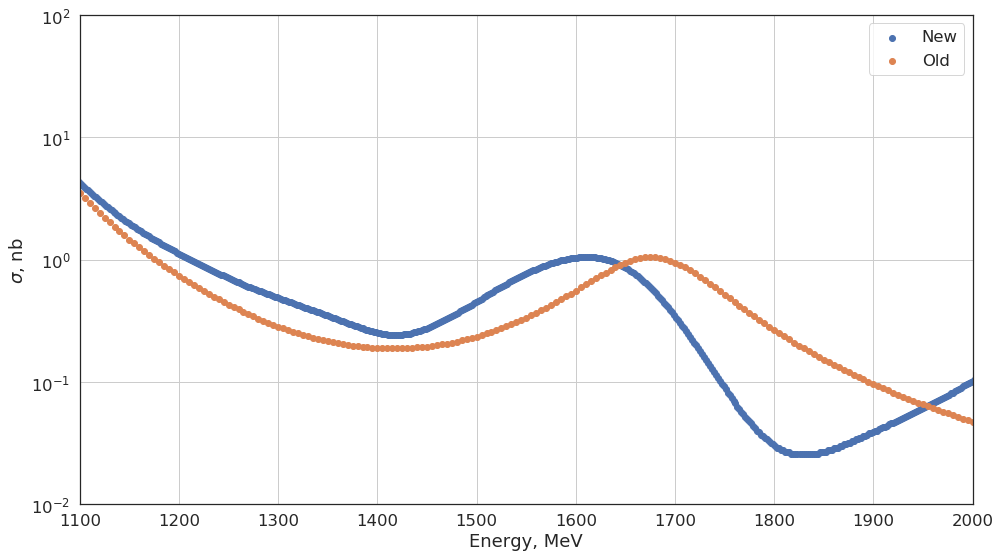

In [14]:
plt.scatter(x=file_new[1], y=file_new[2], label='New')
plt.scatter(x=file_old[1], y=file_old[2], label='Old')
plt.grid()
plt.ylabel('$\\sigma$, nb')
plt.xlabel('Energy, MeV')
plt.xlim(1100, 2000)
plt.ylim(0.01, 100)
plt.yscale('log')
plt.legend(frameon=True)

Теперь основная часть

In [5]:
energy = 750
entrystop = None#1e5

In [6]:
f = uproot.open(f'root://cmd//scan2011/scan2011_tr_ph_fc_e{energy}_v6.root')

In [11]:
#Сравниваю два файла моделирования
f1 = uproot.open('/store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.5.root') #custom mc
f2 = uproot.open('/store17/lukinp/Analysis/klks_high/sim/tr_ph/tr_ph_750.root') #old mc

# Работа с блоком треков

In [7]:
pmin_cut = 40
pmax_cut = 1.1*energy
z_cut = 10
theta_cut = 0.6
theta2_cut = np.pi - theta_cut
hit_cut = 6
chi2r_cut = 30
chi2z_cut = 25
rho_cut = 0.1

In [8]:
import concurrent.futures
executor = concurrent.futures.ThreadPoolExecutor()

In [9]:
def get_table(file):
    return file['tr_ph'].pandas.df(branches=['tptot', 'nt', 'tdedx', 'tz', 'tth', 'tphi', 'tnhit', \
                                          'tchi2r', 'tchi2z', 'trho', 'emeas'], executor=executor, entrystop=entrystop)

In [12]:
%time df = [get_table(f), get_table(f2)]

CPU times: user 37.3 s, sys: 32.2 s, total: 1min 9s
Wall time: 4min 34s


In [14]:
print( df[0].emeas.value_counts(), df[1].emeas.value_counts(), sep='\n' )

747.049988    3800709
Name: emeas, dtype: int64
750.0    26648
Name: emeas, dtype: int64


In [15]:
df2 = [ d.query('nt>=2') for d in df] #условие на количество треков

In [16]:
df2[0].head(20)

tptot  nt         tdedx         tz       tth      tphi  \
entry subentry                                                                 
0     0          721.075012   2   7151.423828 -20.046581  1.234334  3.719504   
      1           67.448746   2   2269.640381  18.134398  2.716921  4.333630   
2     0          771.506226   2   2473.164307   0.363168  2.347710  2.290593   
      1          704.396301   2   2643.112793   0.714955  0.770474  5.431461   
4     0          760.108765   2   2797.253662  -6.365433  0.708503  5.514284   
      1         3596.055420   2   3278.953125  -5.708810  2.474489  2.409088   
7     0          298.677063   2   1639.764771   5.057862  1.330568  1.580624   
      1          305.603394   2   2119.826416   5.311731  1.741933  4.734226   
8     0           67.187218   2   2564.589844 -15.222569  0.963116  4.215925   
      1           35.606735   2   7399.409668 -10.760575  1.319991  3.485251   
10    0          628.219910   3   4843.903320   3.874963  1.479258  2.997980   
      1          178.685211   3  25211.763672   4.156601  1.050754  6.144569   
      2          339.068848   3   8261.856445   4.685727  2.355899  5.733442   
11    0          214.771576   2  19220.648438  16.180531  1.502808  6.003837   
      1          572.052368   2   4467.001465  17.442263  2.176318  4.533700   
13    0         4053.946289   3   2380.271729  -5.152614  1.879638  3.623196   
      1         5746.973145   3   2360.161133  -5.747788  1.212471  0.562723   
      2         1883.314575   3   3254.412842  -8.823583  1.114632  0.543010   
15    0          285.782837   6   2887.059326  23.715784  2.575354  0.477013   
      1          114.217857   6   2609.803711  21.871792  2.525360  0.351637   

                tnhit    tchi2r    tchi2z      trho       emeas  
entry subentry                                                   
0     0            11  2.850195  0.376794 -3.826910  747.049988  
      1             9  0.398980  1.672827 -1.283637  747.049988  
2     0            12  0.401732  0.671633 -0.008306  747.049988  
      1             9  1.204567  0.422802 -0.010346  747.049988  
4     0            13  0.654372  0.788512  0.002047  747.049988  
      1             5  0.436357  0.315149 -0.091651  747.049988  
7     0            15  1.757899  0.583286 -1.642611  747.049988  
      1            18  1.828558  1.511308  1.555916  747.049988  
8     0            21  1.309552  1.036977 -0.158688  747.049988  
      1             5  1.167505  1.990253  3.394458  747.049988  
10    0            21  0.688107  1.242387  1.825350  747.049988  
      1            13  1.637680  1.237462 -1.883173  747.049988  
      2             8  0.627382  0.594351 -1.530257  747.049988  
11    0            17  0.504200  0.019607 -1.716012  747.049988  
      1            15  0.971898  2.452797 -0.816713  747.049988  
13    0            18  0.798847  0.834950 -1.410612  747.049988  
      1            16  0.430169  0.974411  1.166437  747.049988  
      2             6  2.520129  0.929472  0.683609  747.049988  
15    0            14  0.396382  0.781485 -0.574012  747.049988  
      1             7  1.007012  0.522467 -0.718724  747.049988

In [17]:
df2 = [ d.query('tptot>@pmin_cut&\
tptot<@pmax_cut&\
abs(tz)<@z_cut&\
tchi2r<@chi2r_cut&\
tchi2z<@chi2z_cut&\
tth>@theta_cut&tth<@theta2_cut&\
tnhit>@hit_cut&\
abs(trho)>@rho_cut') for d in df2 ]

In [18]:
df2[0].shape

(382140, 11)

In [19]:
drop_entries = [ d.groupby('entry').agg({'tz':'count'}).query('tz!=2').index for d in df2]

In [20]:
df3 = [ d.drop(index=de, level=0) for d,de in zip(df2,drop_entries) ]

In [21]:
df3[0].shape

(212266, 11)

In [23]:
df6 = [ d.query('tdedx<16000') for d in df3 ]

In [24]:
def piDeDx(P):
    return 5.58030e+9 / np.power(P + 40., 3) + 2.21228e+3 - 3.77103e-1 * P;
xpions = np.linspace(40, pmax_cut, 200)
ypions_max = piDeDx(xpions) + 2000
ypions_min = piDeDx(xpions) - 2000

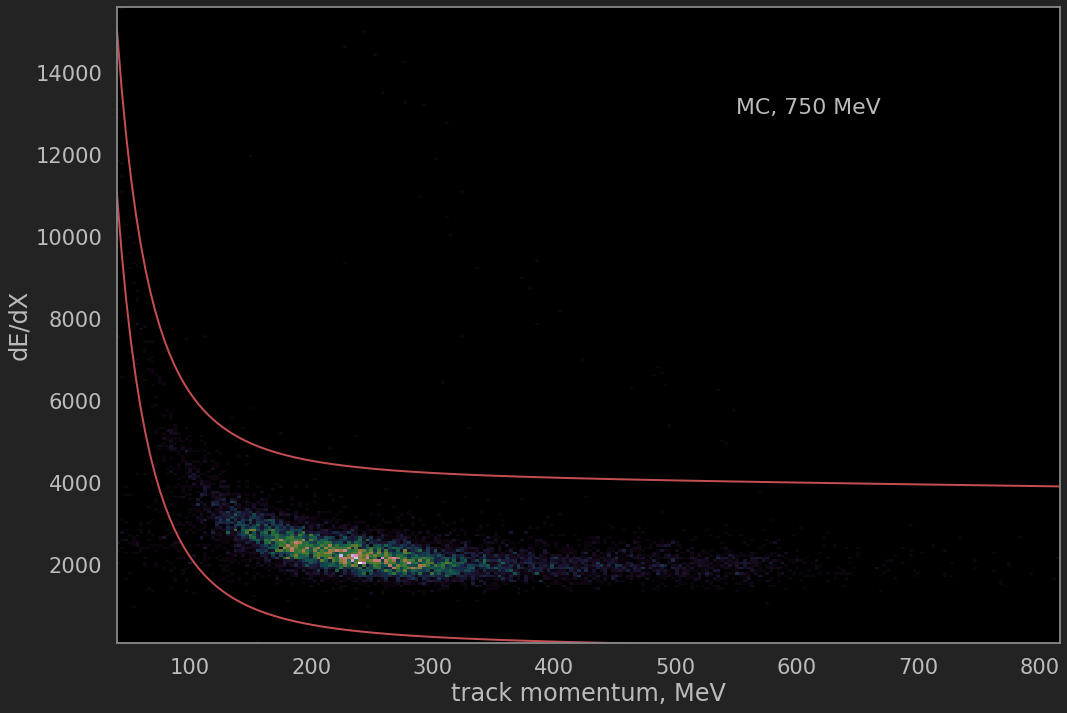

In [58]:
plt.hist2d(df6[0].tptot, df6[0].tdedx, bins=(250, 250), cmap=plt.cm.cubehelix);
# plt.colorbar()
plt.plot(xpions,ypions_max, color='r', linewidth=2);
plt.plot(xpions,ypions_min, color='r', linewidth=2);
plt.text(550, 13000, f'HIGH2011, {energy} MeV')
my_style('','track momentum, MeV', 'dE/dX')
# plt.savefig('Journal/outputs/images/beginning_dedx.png')

In [51]:
df4 = [ d.assign(dedx_cut=piDeDx(d['tptot'])-d['tdedx']).query( 'abs( dedx_cut ) < 2000' ) for d in df3]

In [52]:
drop_events = [ d.groupby('entry').agg({'tz':'count'}).query('tz!=2').index for d in df4]

In [53]:
df4 = [ d.drop(index=de, level=0) for d,de in zip(df4, drop_events) ]

In [54]:
df4[0].shape

(37086, 12)

In [55]:
df4[0].head()

tptot  nt        tdedx        tz       tth      tphi  \
entry subentry                                                              
7     0         298.677063   2  1639.764771  5.057862  1.330568  1.580624   
      1         305.603394   2  2119.826416  5.311731  1.741933  4.734226   
298   0         730.980896   2  1813.002808  6.272086  1.843012  2.532730   
      1         679.191223   2  1837.026855  7.013615  1.344222  5.679761   
456   0         198.416351   2  2373.200684 -3.585775  1.569273  0.363164   

                tnhit    tchi2r    tchi2z      trho       emeas    dedx_cut  
entry subentry                                                               
7     0            15  1.757899  0.583286 -1.642611  747.049988  603.531414  
      1            18  1.828558  1.511308  1.555916  747.049988  112.393086  
298   0            18  0.821523  0.679580 -1.509004  747.049988  135.798722  
      1            15  0.987187  1.282021  1.555343  747.049988  134.129242  
456   0            19  1.272138  0.677395  0.920702  747.049988  176.020921

## Теперь работа с блоком KS

In [59]:
align_cut = 0.8
p_cut =  2 * (0.0869 * energy - 36.53)
print(f'Align cut: {align_cut}')
print(f'Momentum cut: {p_cut:.2f} MeV')

Align cut: 0.8
Momentum cut: 57.29 MeV


In [60]:
def get_table_ks(file):
    return file['tr_ph'].pandas.df(branches=['nks', 'kstype', 'ksalign', 'ksminv', 'ksvind', \
                                            'ksptot', 'ksth', 'ksphi'], executor=executor, entrystop=entrystop)

In [61]:
%time dfks = [get_table_ks(f), get_table_ks(f2)]

CPU times: user 16.8 s, sys: 12.9 s, total: 29.7 s
Wall time: 2min 1s


In [62]:
ksvind_drops = [f'ksvind[{i}]' for i in range(2,20)]
[ d.drop(ksvind_drops, axis=1, inplace=True) for d in dfks];

In [63]:
dfks[0].shape

(95909, 9)

In [64]:
[ d.query('kstype==0', inplace=True) for d in dfks];

In [65]:
index_merge = [ dks.index.droplevel(1) & d.index.droplevel(1) for dks,d in zip(dfks, df4) ]
#оставить только entry, потому что subentry в таблицах означают разные вещи
dfks = [ d.loc[ind, ] for d,ind in zip(dfks,index_merge) ]

### Оставить только лучшие KS в каждом событии

In [66]:
dfks = [ d.assign(difmass = np.abs(d['ksminv'] - 497.6) ) for d in dfks ]
min_difmasses = [ d.groupby('entry').agg({'difmass':np.min}) for d in dfks ]
dfks2 = [pd.merge(md, d, on=['difmass', 'entry']).drop(['difmass'], axis=1) for md, d in zip(min_difmasses, dfks)]

In [67]:
dfks2[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
837,1,0,-0.874285,480.573029,0,1,301.411102,0.093572,0.830619
1528,2,0,0.172437,440.643707,0,1,226.224945,2.113568,4.922874
10553,1,0,0.810130,513.931519,0,1,22.297539,2.556979,1.332647
11198,1,0,-0.851861,524.389893,1,3,388.817078,1.570812,4.776455
16377,1,0,0.814442,463.275146,0,1,333.078094,0.350356,2.259204


In [68]:
dfks2[0].shape

(1227, 9)

### Разница между исправленными углами и начальными

In [69]:
dfks2[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
837,1,0,-0.874285,480.573029,0,1,301.411102,0.093572,0.830619
1528,2,0,0.172437,440.643707,0,1,226.224945,2.113568,4.922874
10553,1,0,0.810130,513.931519,0,1,22.297539,2.556979,1.332647
11198,1,0,-0.851861,524.389893,1,3,388.817078,1.570812,4.776455
16377,1,0,0.814442,463.275146,0,1,333.078094,0.350356,2.259204


In [70]:
df_ang = [ d.loc[dks.index,].copy() for d, dks in zip(df4, dfks2)]
df_ang = [ d.assign(px = d.tptot*np.sin(d.tth)*np.cos(d.tphi),\
              py = d.tptot*np.sin(d.tth)*np.sin(d.tphi),\
              pz = d.tptot*np.cos(d.tth)) for d in df_ang]

In [71]:
df_ang = [ d[['px','py','pz']].groupby('entry').agg('sum') for d in df_ang]
df_ang = [ d.assign(ptot = lambda x: np.sqrt( x.px**2 + x.py**2 + x.pz**2 ),\
              th = lambda x: np.arctan2(np.sqrt( x.px**2 + x.py**2 ), x.pz), \
              phi = np.arctan2(d.py, d.px) ).drop(['px','py','pz'], axis=1) for d in df_ang]

In [72]:
df_ang = [ pd.merge(d, dks[['ksptot', 'ksth', 'ksphi']], on='entry') for d, dks in zip(df_ang, dfks2)]

In [73]:
for d in df_ang:
    d['ksphi'] = d.ksphi.where(d.ksphi<np.pi, d.ksphi-2*np.pi)

In [74]:
df_ang[0].shape

(1227, 6)

In [75]:
df_ang[0].head()

,ptot,th,phi,ksptot,ksth,ksphi
entry,,,,,,
837,298.221344,0.103714,0.823400,301.411102,0.093572,0.830619
1528,462.639984,2.178858,-1.747170,226.224945,2.113568,-1.360312
10553,28.986090,2.666595,1.246496,22.297539,2.556979,1.332647
11198,390.274872,1.579325,-1.510180,388.817078,1.570812,-1.506730
16377,343.625275,0.354838,2.249610,333.078094,0.350356,2.259204


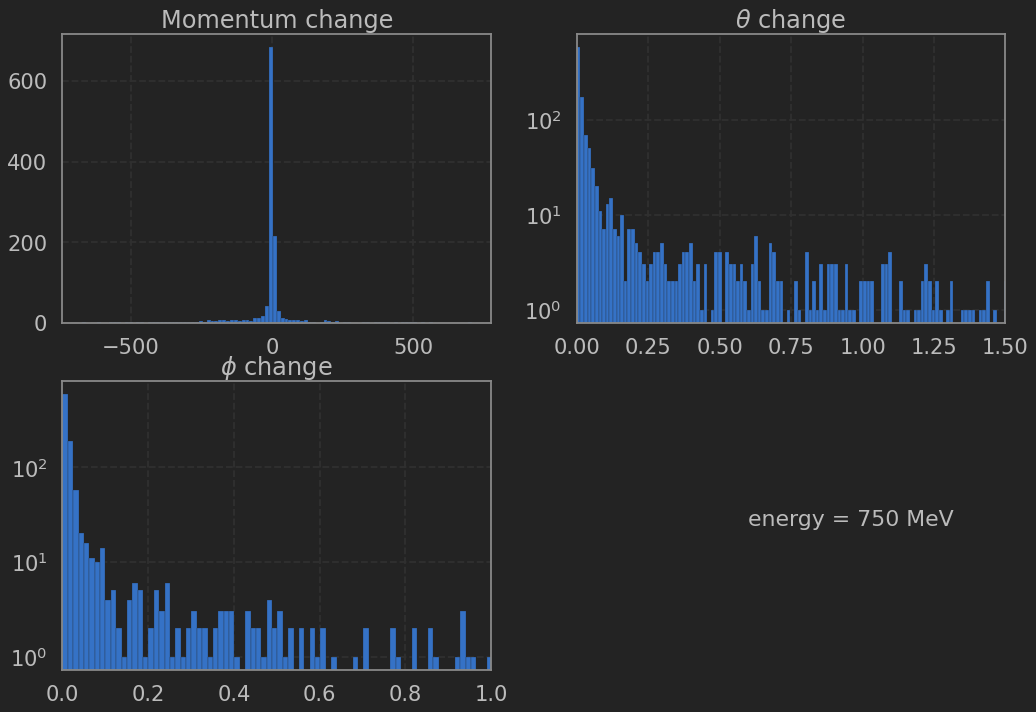

In [76]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.hist(df_ang[0].ptot - df_ang[0].ksptot, bins=100);
plt.title('Momentum change');
plt.subplot(2,2,2)
plt.hist(np.abs(df_ang[0].th - df_ang[0].ksth), bins=200);
plt.xlim(0,1.5)
plt.yscale('log')
plt.title('$\\theta$ change');
plt.subplot(2,2,3)
plt.hist(np.abs(df_ang[0].phi - df_ang[0].ksphi), bins=500);
plt.xlim(0, 1)
plt.yscale('log')
plt.title('$\\phi$ change');
plt.subplot(2,2,4)
plt.axis('off')
plt.text(0.4, 0.5, f'energy = {energy} MeV');

### Кат по $\alpha$

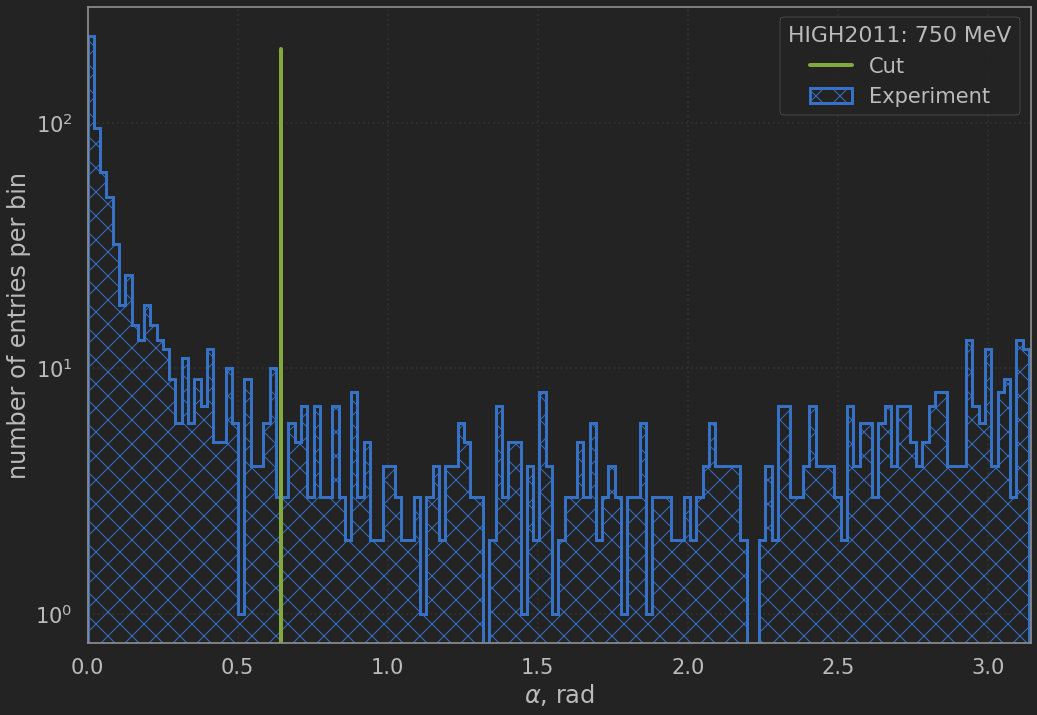

In [135]:
plt.hist(np.arccos(dfks2[0].ksalign), bins=150, hatch='x', histtype='step', lw=3, label='Experiment');
yy = [0, 2*10e1]
xx = np.arccos( np.ones(2)*align_cut )
plt.plot(xx, yy, lw=4, label='Cut')
plt.grid(ls='--')
plt.xlim(0, np.pi)
plt.legend(title=f'HIGH2011: {energy} MeV')
plt.yscale('log')
my_style('','$\\alpha$, rad', 'number of entries per bin')
# plt.savefig('Journal/outputs/images/beginning_alpha.png')

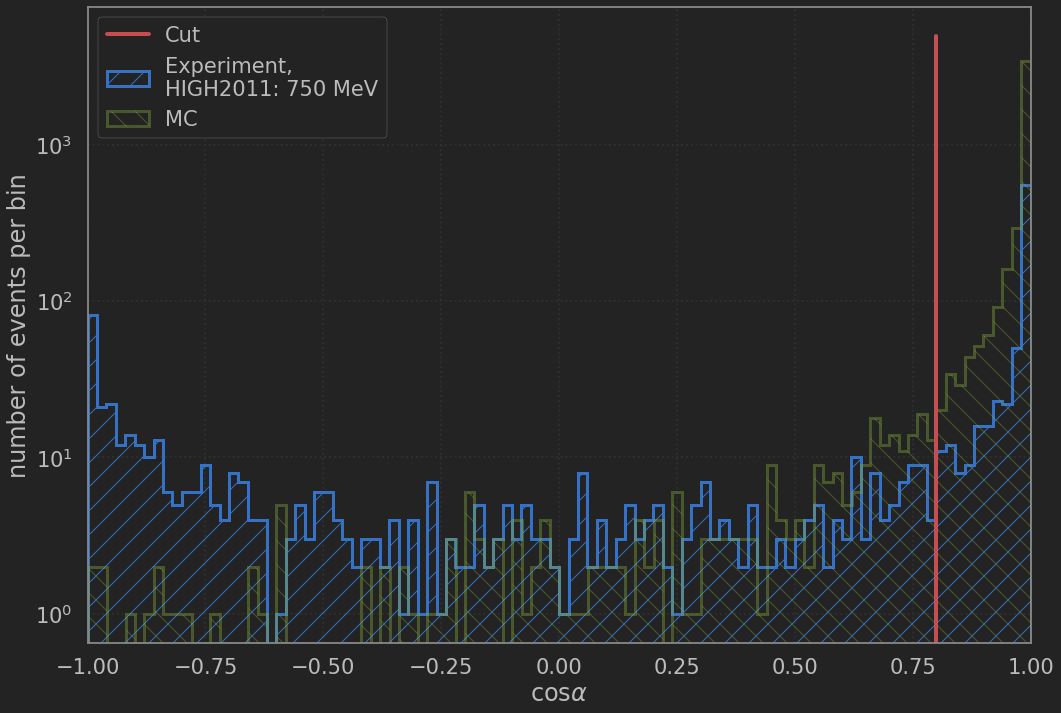

In [111]:
plt.hist(dfks2[0].ksalign, bins=100, histtype='step', lw=3, hatch='/', alpha=1, label=f'Experiment,\nHIGH2011: {energy} MeV');
plt.hist(dfks2[1].ksalign, bins=100, histtype='step', lw=3, hatch='\\', alpha=0.4, label='MC');
yy = [0, 5*10e2]
xx = np.ones(2)*align_cut
plt.plot(xx, yy, lw=4, label='Cut')
plt.grid(ls='--')
plt.xlim(-1, 1)
plt.yscale('log')
plt.legend()
my_style('','$\cos{\\alpha}$','number of events per bin')
# plt.savefig('Journal/outputs/images/beginning_cosa.png')

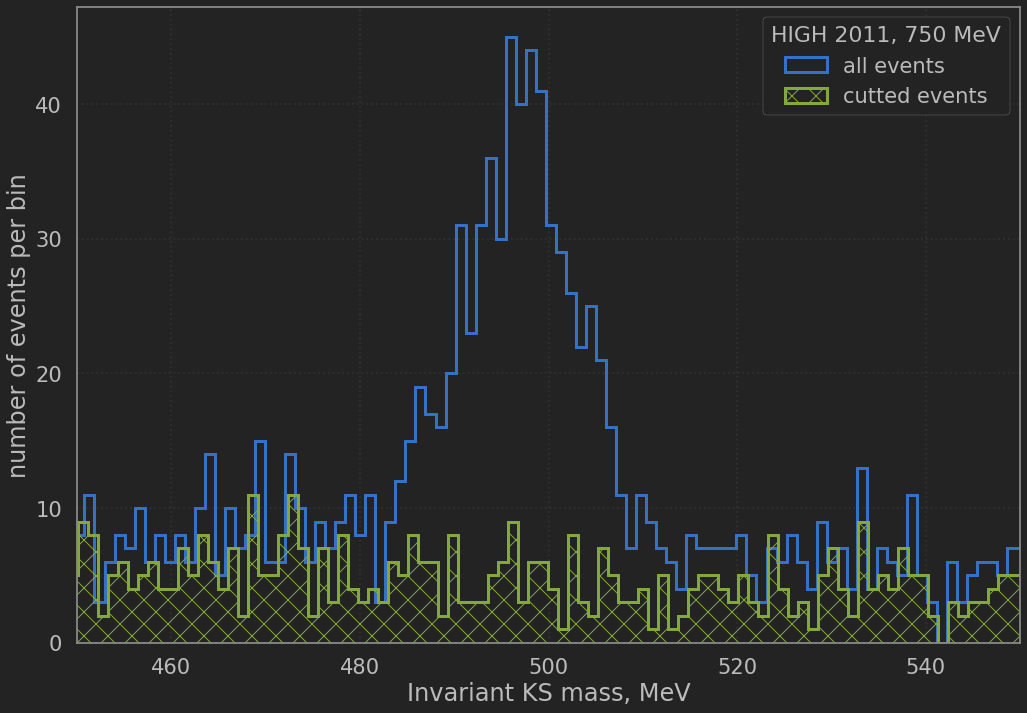

In [125]:
plt.hist( dfks[0].ksminv, bins=150, label='all events', histtype='step', lw=3 );
plt.hist( dfks[0][dfks[0]['ksalign']<align_cut].ksminv, bins=150, label='cutted events', histtype='step',hatch='x', lw=3 );
plt.grid(ls=':');
plt.legend(title='HIGH 2011, 750 MeV', frameon=True);
plt.xlim(450, 550);
plt.xlabel('Invariant KS mass, MeV');
plt.ylabel('number of events per bin');
# plt.savefig('Journal/outputs/images/beginning_cosa_invmass.png')

In [47]:
dfks3 = [ d.query('ksalign>@align_cut') for d in dfks2]

In [48]:
dfks3[0].shape

(4590, 9)

### Кат по импульсу

In [49]:
p_ideal = np.sqrt(energy**2 - 497.6**2)
dfks4 = [ d.query('abs(ksptot - @p_ideal)<@p_cut') for d in dfks3]

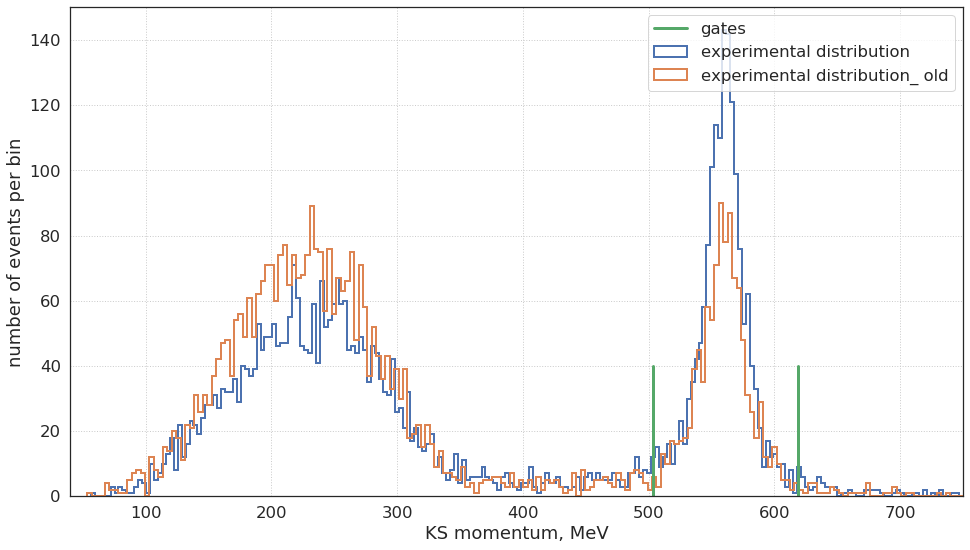

In [50]:
plt.hist(dfks3[0].ksptot, bins=220, histtype='step', lw=2, label='experimental distribution');
plt.hist(dfks3[1].ksptot, bins=220, histtype='step', lw=2, label='experimental distribution_ old');
xx = np.ones(2)*p_ideal
yy = np.linspace(0, 40, 2)
plt.plot(xx-p_cut, yy, c='g', lw=3, label='gates')
plt.plot(xx+p_cut, yy, c='g', lw=3)
plt.xlim(pmin_cut, energy);
plt.grid(ls=':');
plt.legend(frameon=True);
plt.xlabel('KS momentum, MeV');
plt.ylabel('number of events per bin');

In [51]:
dfks4[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
18,1,0,0.974665,518.642273,0,1,618.302063,2.037943,3.891665
23,1,0,0.995576,445.000244,0,1,580.423218,1.275376,2.889709
24,1,0,0.999972,496.352020,0,1,563.272400,1.692486,1.235848
41,1,0,0.999927,500.651520,0,1,557.944763,2.080942,2.384397
51,1,0,0.999996,496.122192,0,1,560.477600,1.835418,0.136228


In [52]:
dfks4[0].shape

(1610, 9)

# Объединить результат из блока KS и треков

In [53]:
df5 = [ pd.DataFrame( d.to_records() ).set_index('entry') for d in df4] #превратить subentry в обычный столбец
df5 = [ d.groupby('entry').agg(ksvind_0 = ('subentry', 'min'),
                         ksvind_1 = ('subentry','max') ) for d in df5]

In [54]:
dfks4 = [ d.rename({'ksvind[0]':'ksvind_0', 'ksvind[1]':'ksvind_1'}, axis=1) for d in dfks4 ]

In [55]:
df5[0].head()

,ksvind_0,ksvind_1
entry,,
3,0,1
9,0,1
10,0,1
13,0,1
14,0,1


In [56]:
dfks4[0].head()

,nks,kstype,ksalign,ksminv,ksvind_0,ksvind_1,ksptot,ksth,ksphi
entry,,,,,,,,,
18,1,0,0.974665,518.642273,0,1,618.302063,2.037943,3.891665
23,1,0,0.995576,445.000244,0,1,580.423218,1.275376,2.889709
24,1,0,0.999972,496.352020,0,1,563.272400,1.692486,1.235848
41,1,0,0.999927,500.651520,0,1,557.944763,2.080942,2.384397
51,1,0,0.999996,496.122192,0,1,560.477600,1.835418,0.136228


In [57]:
(dfks4[0].ksvind_0 > dfks4[0].ksvind_1).sum() #проверка, что в нулевом всегда меньшее значение чем в первом

0

In [58]:
dfks4[0].shape

(1610, 9)

In [59]:
result = [ pd.merge(d, dks, on=['entry', 'ksvind_0', 'ksvind_1']) for d, dks in zip(df5, dfks4) ]

In [60]:
result[0].head()

,ksvind_0,ksvind_1,nks,kstype,ksalign,ksminv,ksptot,ksth,ksphi
entry,,,,,,,,,
18,0,1,1,0,0.974665,518.642273,618.302063,2.037943,3.891665
23,0,1,1,0,0.995576,445.000244,580.423218,1.275376,2.889709
24,0,1,1,0,0.999972,496.352020,563.272400,1.692486,1.235848
41,0,1,1,0,0.999927,500.651520,557.944763,2.080942,2.384397
51,0,1,1,0,0.999996,496.122192,560.477600,1.835418,0.136228


In [61]:
result[0].shape

(1597, 9)

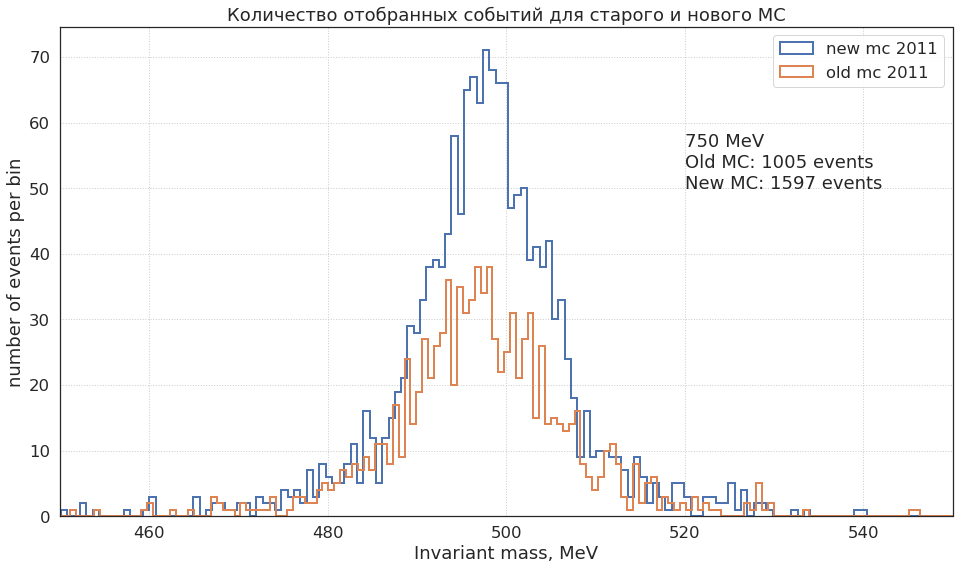

In [62]:
plt.hist(result[0].ksminv, histtype='step', bins=200, lw=2, label='new mc 2011');
plt.hist(result[1].ksminv, histtype='step', bins=200, lw=2, label='old mc 2011');
plt.grid(ls=":")
plt.xlim(450, 550);
plt.xlabel('Invariant mass, MeV');
plt.ylabel('number of events per bin');
plt.legend(frameon=True);
plt.text(520, 50, f'{energy} MeV\nOld MC: {result[1].shape[0]} events\nNew MC: {result[0].shape[0]} events')
plt.title('Количество отобранных событий для старого и нового MC');